## Importing Required Libaries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

REading CSV File

In [ ]:
dat = pd.read_csv('weatherAUS.csv')


# Converting date columns

In [ ]:
def crt_dat(dt):
    tem= datetime.strptime(dt, "%Y-%m-%d")
    epoch = datetime(2008, 1, 1)
    days_from_epoch = (tem - epoch).days
    return days_from_epoch

# print(dat['region'].isna().any())
dat['Date']= dat['Date'].apply(crt_dat)


In [ ]:
unique_values_B = dat['RainTomorrow'].unique()
print("Unique values in column 'B':", unique_values_B)

Unique values in column 'B': ['No' 'Yes' nan]


# Label encoding (Yes No Colums)

In [ ]:
dat = dat.dropna(subset=['RainToday'])
dat = dat.dropna(subset=['RainTomorrow'])

print(dat['RainToday'].isna().sum())
print(dat['RainTomorrow'].isna().sum())


label_encoder = LabelEncoder()

# Fit label encoder and transform the specified column
dat['RainToday'] = label_encoder.fit_transform(dat['RainToday'])
dat['RainTomorrow'] = label_encoder.fit_transform(dat['RainTomorrow'])

dat.head(10)


0
0


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,335,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,336,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,337,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,338,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,339,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
5,340,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0,0
6,341,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0,0
7,342,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0,0
8,343,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0,1
9,344,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1,0


In [ ]:
unique_values_B = dat['RainTomorrow'].unique()
print("Unique values in column 'B':", unique_values_B)

Unique values in column 'B': [0 1]


In [ ]:
print(dat['Evaporation'].isna().sum())
dat.drop(columns=['Evaporation', 'Sunshine'], inplace=True)


18197


# Handling Nan Values

Numerical Values

In [ ]:
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                   'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                   'RainToday', 'RainTomorrow']

for location in dat['Location'].unique():
    # Filter the DataFrame based on the current location
    condition = (dat['Location'] == location)
    filtered_data = dat[condition].copy()

    # Exclude columns with all NaN values
    numeric_columns_filtered = filtered_data[numeric_columns].columns[filtered_data[numeric_columns].notnull().any()]

    # Convert columns to numeric
    filtered_data[numeric_columns_filtered] = filtered_data[numeric_columns_filtered].apply(pd.to_numeric, errors='coerce')

    # Initialize and fit the imputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer.fit(filtered_data[numeric_columns_filtered])

    # Transform the values
    transformed_values = imputer.transform(filtered_data[numeric_columns_filtered])

    # Assign values back to the DataFrame
    dat.loc[condition, numeric_columns_filtered] = transformed_values

columns_to_fill = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                   'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                   'RainToday', 'RainTomorrow']


dat = dat.fillna(dat.mean())

# 'WindGustDir', 'WindDir9am''WindDir3pm',
for i in numeric_columns:
   print(i,dat[i].isna().sum())



dat.head(10)

MinTemp 0
MaxTemp 0
Rainfall 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0
RainToday 0
RainTomorrow 0


<ipython-input-8-c24831f943ef>:33: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dat = dat.fillna(dat.mean())


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,335,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,5.426638,16.9,21.8,0.0,0.0
1,336,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,6.407059,5.426638,17.2,24.3,0.0,0.0
2,337,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,6.407059,2.000000,21.0,23.2,0.0,0.0
3,338,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,6.407059,5.426638,18.1,26.5,0.0,0.0
4,339,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
5,340,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,...,55.0,23.0,1009.2,1005.4,6.407059,5.426638,20.6,28.9,0.0,0.0
6,341,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,...,49.0,19.0,1009.6,1008.2,1.000000,5.426638,18.1,24.6,0.0,0.0
7,342,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,...,48.0,19.0,1013.4,1010.1,6.407059,5.426638,16.3,25.5,0.0,0.0
8,343,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,...,42.0,9.0,1008.9,1003.6,6.407059,5.426638,18.3,30.2,0.0,1.0
9,344,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,...,58.0,27.0,1007.0,1005.7,6.407059,5.426638,20.1,28.2,1.0,0.0


In [ ]:
unique_values_B = dat['RainTomorrow'].unique()
print("Unique values in column 'B':", unique_values_B)

Unique values in column 'B': [0. 1.]


String Values

In [ ]:
str_col =['WindDir3pm', 'WindDir9am', 'WindGustDir',]
for i in str_col:
  dat = dat.dropna(subset=[i])

In [ ]:
numeric_columns.append("Date")
numeric_columns.remove("RainTomorrow")
numeric_columns.remove("RainToday")


# Removing Outliers

In [ ]:

def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 -( 1.5 * IQR ) # Adjusted multiplier to 1.5 for typical IQR outlier rule
    upper_bound = Q3 + (1.5 * IQR  )# Adjusted multiplier to 1.5 for typical IQR outlier rule
    def rm(dt):
        if (dt < lower_bound) or (dt > upper_bound):
            return np.nan
        return dt
    return data.apply(rm)

# Function to remove outliers using z-score method
def remove_outliers_zscore(data):
    numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
    z_scores = zscore(numeric_data)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)  # Adjust the threshold as needed
    return data[filtered_entries]



In [ ]:

# dat = remove_outliers_zscore(dat)

for i in numeric_columns:
    dat[i] = remove_outliers_iqr(dat[i])
    # dat = dat.dropna(subset=[i])
dat = dat.dropna()
# for i in columns_to_normalize_tw:
#     dat[i] = remove_outliers_iqr(dat[i])
#     dat = dat.dropna(subset=[i])

# for j in range(0,15):
#     for i in columns_to_normalize_tw:
#         dat[i] = remove_outliers_iqr(dat[i])
#         dat = dat.dropna(subset=[i])
# dat.to_csv('avooutl.csv')
dat.reset_index(drop=True, inplace=True)


# Normalising Values

In [ ]:

dat[numeric_columns] = dat[numeric_columns].fillna(0)

# Extract the numeric columns
tem = dat[numeric_columns]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
tem_normalized = scaler.fit_transform(tem)

# Create a DataFrame from normalized data with the same columns as the original DataFrame
normalized_df = pd.DataFrame(tem_normalized, columns=numeric_columns)

# Update the original DataFrame with normalized values
dat[numeric_columns] = normalized_df[numeric_columns]

print(dat.head(20))

        Date Location   MinTemp   MaxTemp  Rainfall WindGustDir  \
0   0.000000   Albury  0.528846  0.450794       0.3           W   
1   0.000320   Albury  0.336538  0.520635       0.0         WNW   
2   0.000639   Albury  0.512821  0.539683       0.0         WSW   
3   0.000959   Albury  0.394231  0.612698       0.0          NE   
4   0.001598   Albury  0.567308  0.666667       0.1         WNW   
5   0.001918   Albury  0.557692  0.517460       0.0           W   
6   0.002238   Albury  0.346154  0.571429       0.0           W   
7   0.002877   Albury  0.519231  0.679365       0.7           W   
8   0.003197   Albury  0.528846  0.688889       0.0           N   
9   0.006074   Albury  0.413462  0.536508       0.0         SSE   
10  0.006394   Albury  0.467949  0.653968       0.0           S   
11  0.007033   Albury  0.756410  0.733333       0.0         WNW   
12  0.007353   Albury  0.589744  0.704762       0.0           N   
13  0.007673   Albury  0.503205  0.752381       0.0           

In [ ]:
dat.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.000000,Albury,0.528846,0.450794,0.3,W,0.587302,W,WNW,0.514286,...,0.6375,0.212121,0.162866,0.221854,1.000000,0.685328,0.464789,0.483974,0.0,0.0
1,0.000320,Albury,0.336538,0.520635,0.0,WNW,0.587302,NNW,WSW,0.057143,...,0.3000,0.242424,0.257329,0.245033,0.800882,0.685328,0.475352,0.564103,0.0,0.0
2,0.000639,Albury,0.512821,0.539683,0.0,WSW,0.619048,W,WSW,0.485714,...,0.2250,0.292929,0.159609,0.274834,0.800882,0.000000,0.609155,0.528846,0.0,0.0
3,0.000959,Albury,0.394231,0.612698,0.0,NE,0.269841,SE,E,0.257143,...,0.3125,0.151515,0.485342,0.410596,0.800882,0.685328,0.507042,0.634615,0.0,0.0
4,0.001598,Albury,0.567308,0.666667,0.1,WNW,0.777778,W,W,0.485714,...,0.4375,0.222222,0.211726,0.165563,0.800882,0.685328,0.595070,0.711538,0.0,0.0


In [ ]:
for column in dat.columns:
    na_count = dat[column].isna().sum()
    print(f"Column '{column}': {na_count} NaN values")

Column 'Date': 0 NaN values
Column 'Location': 0 NaN values
Column 'MinTemp': 0 NaN values
Column 'MaxTemp': 0 NaN values
Column 'Rainfall': 0 NaN values
Column 'WindGustDir': 0 NaN values
Column 'WindGustSpeed': 0 NaN values
Column 'WindDir9am': 0 NaN values
Column 'WindDir3pm': 0 NaN values
Column 'WindSpeed9am': 0 NaN values
Column 'WindSpeed3pm': 0 NaN values
Column 'Humidity9am': 0 NaN values
Column 'Humidity3pm': 0 NaN values
Column 'Pressure9am': 0 NaN values
Column 'Pressure3pm': 0 NaN values
Column 'Cloud9am': 0 NaN values
Column 'Cloud3pm': 0 NaN values
Column 'Temp9am': 0 NaN values
Column 'Temp3pm': 0 NaN values
Column 'RainToday': 0 NaN values
Column 'RainTomorrow': 0 NaN values


# Onehot Encoding

In [ ]:
cols_onehot = ['WindDir3pm', 'WindDir9am', 'WindGustDir', 'Location']



ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cols_onehot)], remainder='passthrough')

# Fit and transform the data
transformed_data = ct.fit_transform(dat)
transformed_data_dense = transformed_data.toarray()

# Convert the dense array to a DataFrame
dat = pd.DataFrame(transformed_data_dense, columns=ct.get_feature_names_out())


In [ ]:
dat.head()

,encoder__WindDir3pm_E,encoder__WindDir3pm_ENE,encoder__WindDir3pm_ESE,encoder__WindDir3pm_N,encoder__WindDir3pm_NE,encoder__WindDir3pm_NNE,encoder__WindDir3pm_NNW,encoder__WindDir3pm_NW,encoder__WindDir3pm_S,encoder__WindDir3pm_SE,...,remainder__Humidity9am,remainder__Humidity3pm,remainder__Pressure9am,remainder__Pressure3pm,remainder__Cloud9am,remainder__Cloud3pm,remainder__Temp9am,remainder__Temp3pm,remainder__RainToday,remainder__RainTomorrow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6375,0.212121,0.162866,0.221854,1.000000,0.685328,0.464789,0.483974,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3000,0.242424,0.257329,0.245033,0.800882,0.685328,0.475352,0.564103,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2250,0.292929,0.159609,0.274834,0.800882,0.000000,0.609155,0.528846,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3125,0.151515,0.485342,0.410596,0.800882,0.685328,0.507042,0.634615,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4375,0.222222,0.211726,0.165563,0.800882,0.685328,0.595070,0.711538,0.0,0.0


# Writing Processed CSV

In [ ]:
dat.to_csv(r'weather_processed.csv')


# Importing required packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


# Spliting dataset

In [ ]:
# Split the data into training and testing sets
X = dat.drop(columns = ['remainder__RainTomorrow'])
y = dat['remainder__RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fiting Logistic Regression model and Naïve Bayes classifie

In [ ]:
# Fit Logistic Regression model
log_reg = LogisticRegression(max_iter = 1500, solver = 'liblinear')
log_reg.fit(X_train, y_train)

# Fit Naïve Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

# Construct confusion matrix for Logistic Regression and Naive Bayes classifier

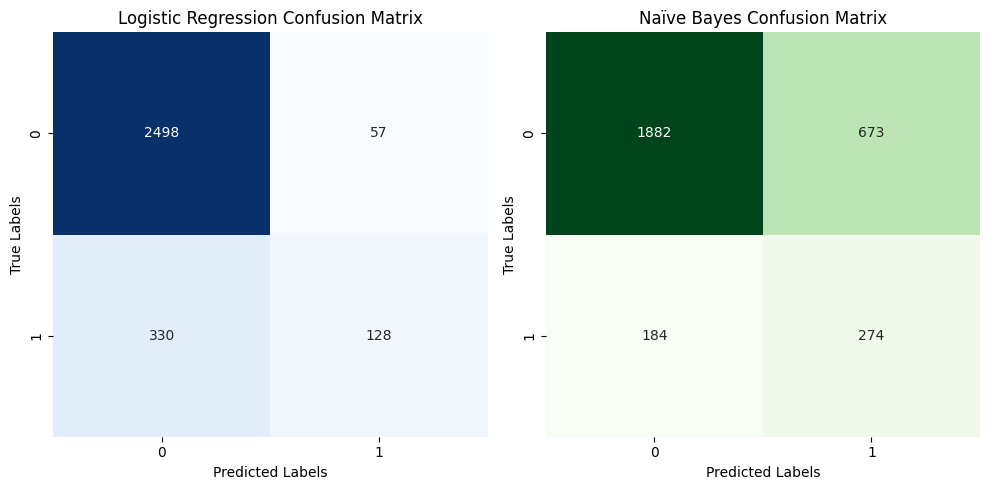

In [ ]:
# Predictions
log_reg_preds = log_reg.predict(X_test)
naive_bayes_preds = naive_bayes.predict(X_test)

# Confusion Matrix
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
naive_bayes_cm = confusion_matrix(y_test, naive_bayes_preds)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(log_reg_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(naive_bayes_cm, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Naïve Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


# Classification Report

In [ ]:
# Classification Report
log_reg_report = classification_report(y_test, log_reg_preds)
naive_bayes_report = classification_report(y_test, naive_bayes_preds)

print("Logistic Regression Classification Report:")
print(log_reg_report)

print("\nNaïve Bayes Classification Report:")
print(naive_bayes_report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2555
         1.0       0.69      0.28      0.40       458

    accuracy                           0.87      3013
   macro avg       0.79      0.63      0.66      3013
weighted avg       0.85      0.87      0.85      3013


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.74      0.81      2555
         1.0       0.29      0.60      0.39       458

    accuracy                           0.72      3013
   macro avg       0.60      0.67      0.60      3013
weighted avg       0.82      0.72      0.75      3013



#  Computing ROC curve and ROC-AUC score

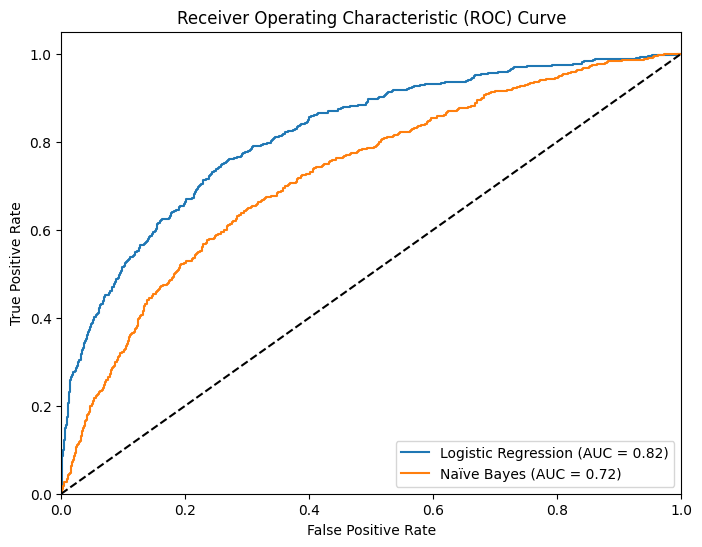

In [ ]:
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
naive_bayes_probs = naive_bayes.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC-AUC score for Logistic Regression
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
log_reg_auc = roc_auc_score(y_test, log_reg_probs)

# Compute ROC curve and ROC-AUC score for Naïve Bayes
naive_bayes_fpr, naive_bayes_tpr, _ = roc_curve(y_test, naive_bayes_probs)
naive_bayes_auc = roc_auc_score(y_test, naive_bayes_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(naive_bayes_fpr, naive_bayes_tpr, label=f'Naïve Bayes (AUC = {naive_bayes_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Performing Cross validation

In [ ]:
def perform_cross_validation(model, X, y, cv=3):
    scores = cross_val_score(model, X, y, cv=cv)
    print(f"Cross-Validation Scores (Accuracy) - {cv}-Fold Cross-Validation:")
    print(scores)
    print(f"Mean Accuracy: {np.mean(scores):.2f}")
    print(f"Standard Deviation: {np.std(scores):.2f}")

perform_cross_validation(log_reg, X, y)
perform_cross_validation(naive_bayes, X, y)



Cross-Validation Scores (Accuracy) - 3-Fold Cross-Validation:
[0.8695479  0.63692492 0.84763991]
Mean Accuracy: 0.78
Standard Deviation: 0.10
Cross-Validation Scores (Accuracy) - 3-Fold Cross-Validation:
[0.77414858 0.53216491 0.65903207]
Mean Accuracy: 0.66
Standard Deviation: 0.10


# Hyperparameter Tuning

In [ ]:
# Define hyperparameters grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
log_best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
perform_cross_validation(log_best_model, X_train, y_train)


Best Hyperparameters: {'C': 100}
Cross-Validation Scores (Accuracy) - 3-Fold Cross-Validation:
[0.87104805 0.87478218 0.8623008 ]
Mean Accuracy: 0.87
Standard Deviation: 0.01


In [ ]:
# Define hyperparameters to tune
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,0.1,1,10,100]}

# Define grid search with cross-validation
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X, y)

# Get best hyperparameters and performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best accuracy:", best_score)

# Get the best model
nb_best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
perform_cross_validation(nb_best_model, X_train, y_train)

Best hyperparameters: {'var_smoothing': 10}
Best accuracy: 0.8472415901170184
Cross-Validation Scores (Accuracy) - 3-Fold Cross-Validation:
[0.84714961 0.84690067 0.84711155]
Mean Accuracy: 0.85
Standard Deviation: 0.00


# Confusion Matrix afer hyperparameter tuning

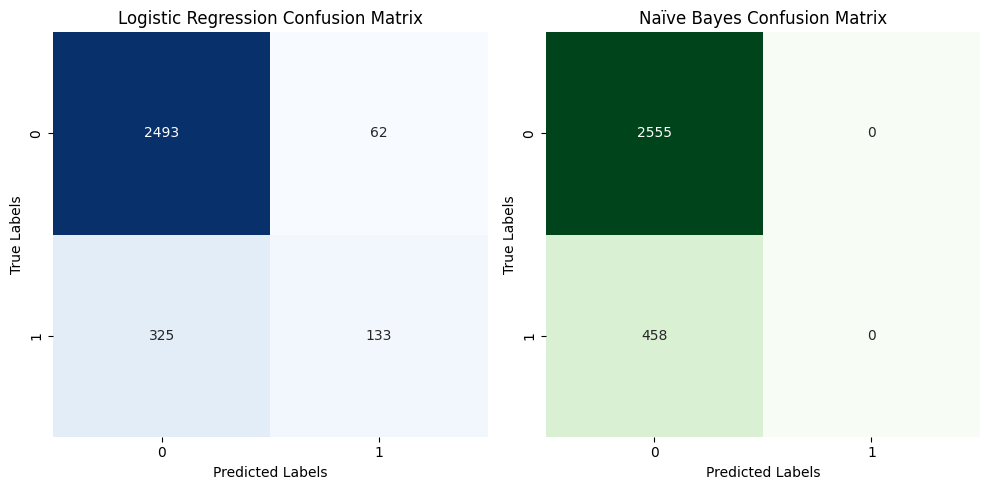

In [ ]:
# Predictions
log_reg_preds = log_best_model.predict(X_test)
naive_bayes_preds = nb_best_model.predict(X_test)

# Confusion Matrix
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
naive_bayes_cm = confusion_matrix(y_test, naive_bayes_preds)

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(log_reg_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(naive_bayes_cm, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Naïve Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


# Inference

Intialy there are lot of unecesary fileds like Evaporation,Sunshine which we find on further analysing and these coloums are remove as they have a lot of nan values. The  on further cleaning and fiting the model we find an Cross-Validation Score of 78% and 66%. Then after performing hyperparameter tuning using various values we find that the Cross-Validation Score has been increaseed to 87% and 85%.

# Conclusion

We can conclude that removing irrevelant data colums and performing hyperparmeter tuning can help to greatly enhance accuracy.